In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

import wrangle_zillow
import wrangle_mall
import env

Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [2]:
#calling in data
df = wrangle_zillow.get_zillow()

#removing un-needed columns
cols_to_remove = ['heatingorsystemtypeid','parcelid','storytypeid','typeconstructiontypeid','airconditioningtypeid','propertylandusetypeid','architecturalstyletypeid','id','buildingclasstypeid','buildingqualitytypeid','decktypeid','pooltypeid10','pooltypeid2','pooltypeid7','taxamount','taxdelinquencyflag','taxdelinquencyyear','id']
df = wrangle_zillow.remove_columns(df, cols_to_remove)

df = wrangle_zillow.handle_missing_values(df)

df.head()

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,4506.0,...,1998.0,485713.0,1023282.0,2016.0,537569.0,6.059063e+13,0.025595,2017-01-01,NaN,Single Family Residential
1,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,12647.0,...,1967.0,88000.0,464000.0,2016.0,376000.0,6.111001e+13,0.055619,2017-01-01,NaN,Single Family Residential
2,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,...,1962.0,85289.0,564778.0,2016.0,479489.0,6.059022e+13,0.005383,2017-01-01,NaN,Single Family Residential
3,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,...,1970.0,108918.0,145143.0,2016.0,36225.0,6.037300e+13,-0.103410,2017-01-01,Central,Single Family Residential
4,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,-118179824.0,63000.0,...,1950.0,276684.0,773303.0,2016.0,496619.0,6.037461e+13,-0.001011,2017-01-01,Central,Single Family Residential


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52254 entries, 0 to 52318
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   52254 non-null  float64
 1   bedroomcnt                    52254 non-null  float64
 2   calculatedbathnbr             52184 non-null  float64
 3   calculatedfinishedsquarefeet  52238 non-null  float64
 4   finishedsquarefeet12          52073 non-null  float64
 5   fips                          52254 non-null  float64
 6   fullbathcnt                   52184 non-null  float64
 7   latitude                      52254 non-null  float64
 8   longitude                     52254 non-null  float64
 9   lotsizesquarefeet             51897 non-null  float64
 10  propertycountylandusecode     52254 non-null  object 
 11  propertyzoningdesc            33749 non-null  object 
 12  rawcensustractandblock        52254 non-null  float64
 13  r

In [4]:
# Split

train, validate, test = wrangle_zillow.split_data(df)

<AxesSubplot:xlabel='logerror', ylabel='Count'>

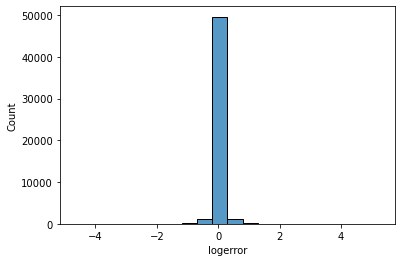

In [5]:
# distribution of log error
sns.histplot(data = df, x ='logerror', bins = 20)

Majority is 0

### Question 1):

Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [6]:
# bring in mapping function
df = wrangle_zillow.map_counties(df)


df.county.value_counts()

los_angeles    33811
orange         14070
ventura         4373
Name: county, dtype: int64

<AxesSubplot:xlabel='logerror'>

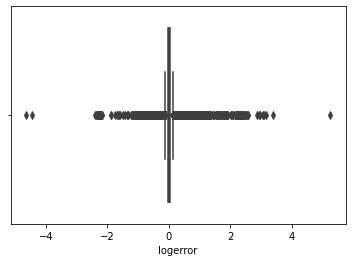

In [7]:
sns.boxplot(data =df, x = 'logerror')

<AxesSubplot:xlabel='logerror', ylabel='county'>

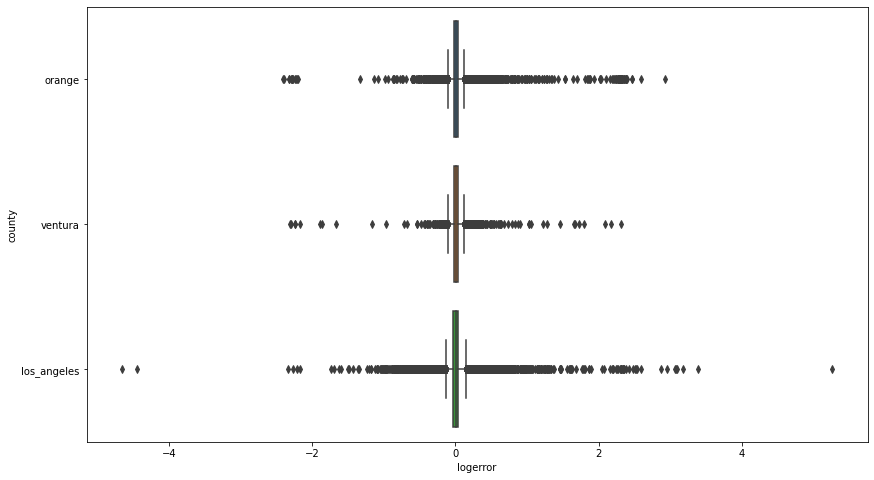

In [8]:
plt.figure(figsize=(14,8))

sns.boxplot(data= df, x = 'logerror', y = 'county' )

<AxesSubplot:xlabel='logerror'>

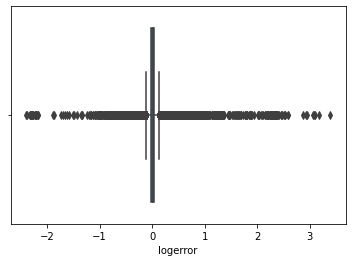

In [9]:
# Clear outliers past -4 and above 4, lets take them out
sns.boxplot(data =df[(df.logerror > -4) & (df.logerror < 4)], x = 'logerror')

<AxesSubplot:xlabel='logerror', ylabel='county'>

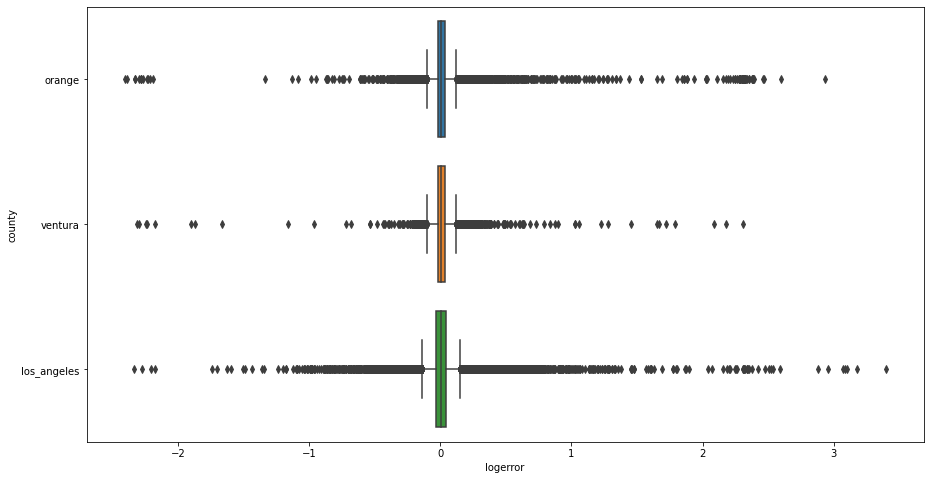

In [10]:
plt.figure(figsize=(15,8))

sns.boxplot(data= df[(df.logerror > -4) & (df.logerror < 4)], x = 'logerror', y = 'county' )

Can't really tell if there is a 'significant' difference even without outliers. 

In [16]:
stats.ttest_1samp(df[df.county == 'los_angeles'].logerror, df.logerror.mean())

Ttest_1sampResult(statistic=-3.182541597317499, pvalue=0.0014612060322864093)

The mean for los_angeles is smaller than the overall population average and it is statistically significant.

In [17]:
stats.ttest_1samp(df[df.county == 'orange'].logerror, df.logerror.mean())

Ttest_1sampResult(statistic=4.913501291359908, pvalue=9.047080718639464e-07)

The mean for orange is larger than the overall population average and it is statistically significant.


In [18]:
stats.ttest_1samp(df[df.county == 'ventura'].logerror, df.logerror.mean())

Ttest_1sampResult(statistic=-1.431770640240493, pvalue=0.1522809550108845)

The difference of the mean for ventura is not statistically different from the population mean.

### Question 2):

Is there a relationship between number of baths vs squarefeet?

Is there a relationship
between bathroom count and logerror?


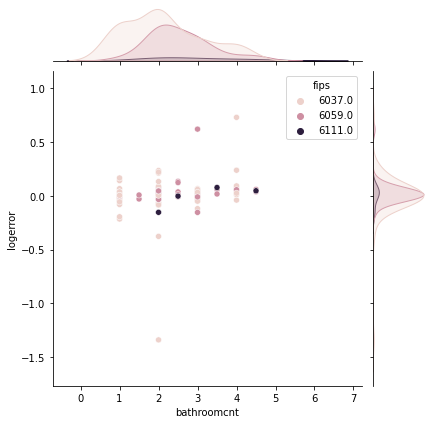

In [20]:
#creating a joinplot to see if any linear relationship
sample = train.sample(100)
print("Is there a relationship\nbetween bathroom count and logerror?")
sns.jointplot(x="bathroomcnt", y="logerror", data=sample, hue = 'fips')
plt.xlabel("Bathroomcnt")
plt.ylabel("Logerror")
plt.show()

#### Takeaway: There doesn't seem to be a relationship between bathrooms and logerror

### Question 3):

Is log error significantly different per number of bedrooms?

Is there a relationship
between bedroom count and logerror?


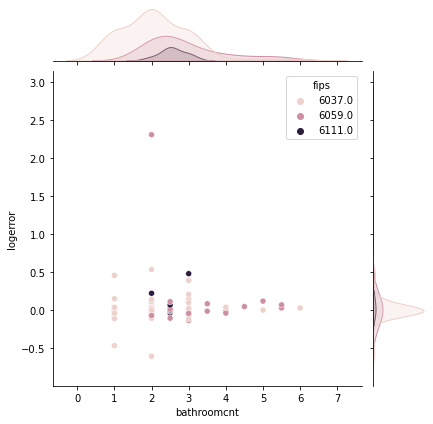

In [21]:
#creating a joinplot to see if any linear relationship
sample = train.sample(100)
print("Is there a relationship\nbetween bedroom count and logerror?")
sns.jointplot(x="bathroomcnt", y="logerror", data=sample, hue = 'fips')
plt.xlabel("Bathroomcnt")
plt.ylabel("Logerror")
plt.show()

#### Takeaway: There does not seem to be a linear relationship between bedroom count and logerror.

### Question 4):

Is there a relationship between logerror and taxvaluedollarcnt?

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='logerror'>

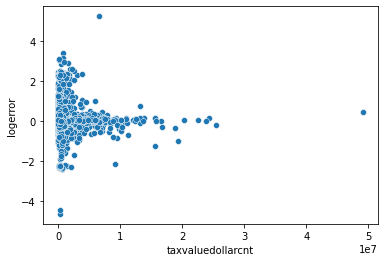

In [24]:
sns.scatterplot(data = df, x = 'taxvaluedollarcnt', y = 'logerror')

There is little to no correlation between taxvalluedollarcnt and logerror.

### Question 5):

Is there a relationship between lot size and log error?

Is there a relationship
between lot size and logerror?


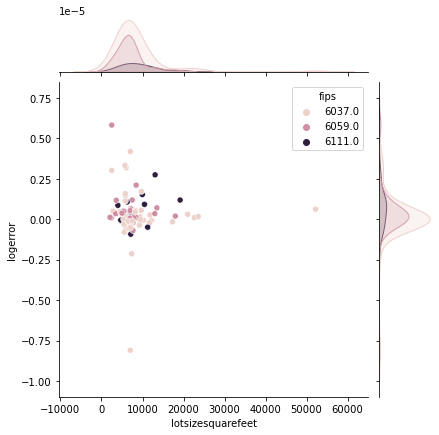

In [25]:
#creating a joinplot to see if any linear relationship
print("Is there a relationship\nbetween lot size and logerror?")
sample = train.sample(100)
sns.jointplot(x="lotsizesquarefeet", y="logerror", data=sample, hue = 'fips')
plt.xlabel("lotsizesquarefeet")
plt.ylabel("Logerror")
plt.show()

#### Takeaway: No, there is no relationship.

### Question 6):

Are certain homes more likley to sell at certain times of the year?

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='transactiondate'>

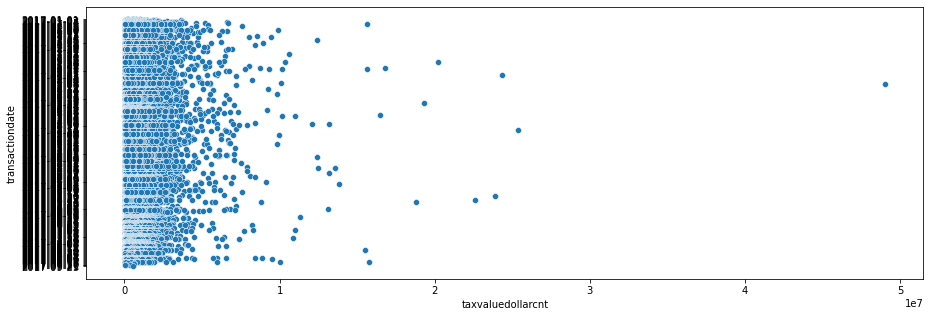

In [26]:
plt.figure(figsize=(15,5))

sns.scatterplot(data=df, x= 'taxvaluedollarcnt', y= 'transactiondate')

No correlation by month/time of year.

### Question 7):

Is there a relationship between year built and log error?

Is there a relationship
between year built and logerror?


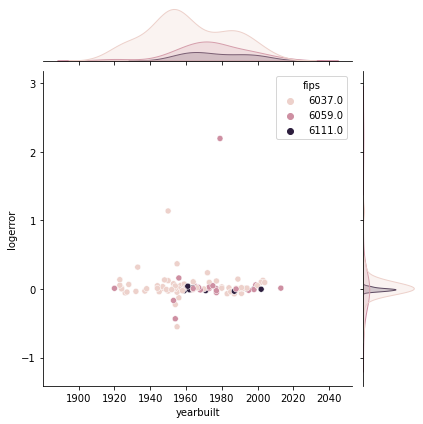

In [28]:
#creating a joinplot to see if any linear relationship
print("Is there a relationship\nbetween year built and logerror?")
sample = train.sample(100)
sns.jointplot(x="yearbuilt", y="logerror", data=sample, hue = 'fips')
plt.xlabel("lotsizesquarefeet")
plt.ylabel("Logerror")
plt.show()

Unsure of this one, may be something there.

### Question 8):

Are there groupings in year built? Ex, certain time periods, dates, etc that they were built that there is a significant correlation with log error as well?

<AxesSubplot:xlabel='yearbuilt', ylabel='Count'>

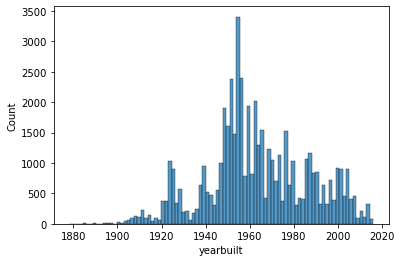

In [29]:
sns.histplot(data=df, x='yearbuilt')


Alot of the houses are built between 1940 - 1960, but does it correlate to log error?

<AxesSubplot:xlabel='yearbuilt', ylabel='logerror'>

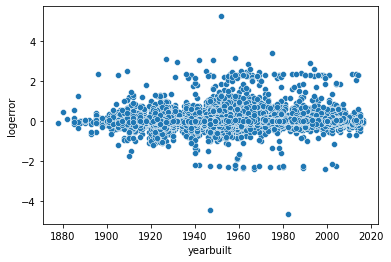

In [30]:
sns.scatterplot(data=df, x='yearbuilt', y='logerror')

Nothing significant.